1. Utwórz DummyClassifier dla zbioru danych wine. 

        Podziel dane używając train_test_split
        Oblicz accuracy (score)

2. Zapisz model i wczytaj go używając joblib 

3. Utwórz KNNClassifier (wszystko jak w pkt.1). 

Dodatkowo używając for loop dla n_neighbors od 1 do 10:

        utwórz 2 krzywe dla zbioru testowego oraz treningowego (score vs n_neighbours)
        sprawdź w jaki sposób wpływa standaryzacja na wyniki

4. Porównaj wyniki pkt 1 vs 3

Rozwiązanie prześlij jako printscreen.

Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_01_niestacj.jpg

In [130]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## 1

In [131]:
# load_wine
wine = load_wine()
features, target = wine.data, wine.target
X, y = wine.data, wine.target

In [132]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [133]:
# defining model
model = DummyClassifier()
model.fit(X_train, y_train)
#preds= model.predict(X_test)

DummyClassifier()

score(X, y[, sample_weight]) Return the mean accuracy on the given test data and labels.

X array-like of shape (n_samples, n_features)

    Test samples.
y array-like of shape (n_samples,) or (n_samples, n_outputs)

    True labels for X.


In [134]:
# accuracy_score
print(model.score(preds, y_test))

0.4067796610169492


## 2

In [135]:
# save the model to disk
filename = 'dummy_model.sav'
joblib.dump(model, filename)

['dummy_model.sav']

In [136]:
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.4067796610169492


## 3

In [137]:
# fit only train data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [138]:
n_neighbors = list(range(1, 11))
test_score = []
train_score = []

In [139]:
# defining model
for i in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_std, y_train)
    # predictions for test
    #preds = model.predict(X_test_std)
    
    # lists of scores for future evaluating
    test_score.append(round(model.score(X=X_train_std, y=y_train), 3))
    train_score.append(round(model.score(X=X_test_std, y=y_test), 3))

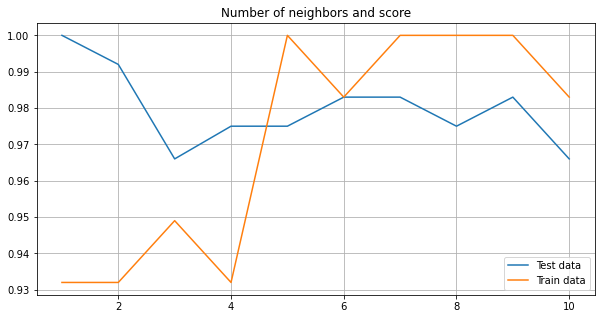

In [140]:
plt.figure(figsize=(10,5))

sns.lineplot(x=n_neighbors, y=test_score, label="Test data")
sns.lineplot(x=n_neighbors, y=train_score, label="Train data")

plt.title("Number of neighbors and score")
plt.legend()
plt.grid();

# 4

Using standarization we're reciving scores from 0.93 to 1.00
Score without standarization is 0.41